# Линейная регрессия. Однофакторный дисперсионный анализ

__1. Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):__

__salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]__

__Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.__

__1) Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.__

__2) Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.__

__3) Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.__

__4) Оцените построенное уравнение регрессии с помощью F-критерия Фишера.__

__5) Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.__

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b1 = (np.cov(salary, scoring)/np.var(salary, ddof=1))[0, 1]
b0 = scoring.mean() - b1 * salary.mean()

print(f"Коэффициенты линейной регрессии по формулам для парной регрессии: b0 = {b0}, b1 = {b1}")

x = salary.copy().reshape(-1,1)
y = scoring.copy().reshape(-1,1)
x = np.hstack((np.ones((x.shape[0], 1)), x))

b = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(f"Коэффициенты линейной регрессии методом наименьших квадратов: b0 = {b[0,0]}, b1 = {b[1,0]}")

Коэффициенты линейной регрессии по формулам для парной регрессии: b0 = 444.1773573243596, b1 = 2.620538882402765
Коэффициенты линейной регрессии методом наименьших квадратов: b0 = 444.17735732435915, b1 = 2.6205388824027684


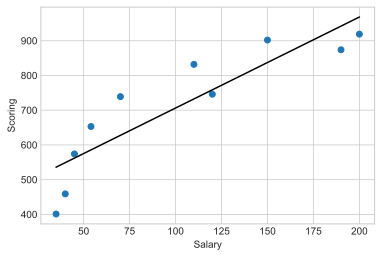

In [3]:
plt.scatter(salary, scoring)
x_plt = np.linspace(min(salary), max(salary), 100)
plt.plot(x_plt, b0 + b1*x_plt, color='black')

plt.xlabel('Salary')
plt.ylabel('Scoring');

In [4]:
z = b0 + b1*salary
R = z.var() / scoring.var()
A = np.abs((scoring - z) / scoring).mean()
print(f'Коэффициент детерминации = {R}, средняя ошибка аппроксимации = {A}')

Коэффициент детерминации = 0.7876386635293678, средняя ошибка аппроксимации = 0.11469251843561709


In [5]:
k1 = 1
k2 = len(salary) - 1 - 1
alpha = 0.05

T = (R / (1 - R)) * (k2 / k1)
F_crit = stats.f.ppf(1 - alpha, k1, k2)

print(f"T = {T}, F_crit = {F_crit}\nУравнение регрессии статистически {'значимо' if T>F_crit else 'незначимо'}")

T = 29.67164085966437, F_crit = 5.317655071578714
Уравнение регрессии статистически значимо


In [6]:
s_slope = np.sqrt((((scoring - z) ** 2).sum() / (len(scoring) - 2)) / (((salary - salary.mean()) ** 2).sum()))
t = stats.t.ppf(1 - alpha / 2, df=len(salary) - 2)
s_intercept = s_slope * np.sqrt((salary ** 2).mean())

print(f"""Стандартная ошибка для коэффициента наклона = {s_slope}.
Доверительный интервал для коэффициента наклона (b1): {(b1 - t * s_slope, b1 + t * s_slope)} при p = {1-alpha}.\n
Стандартная ошибка для коэффициента сдвига = {s_intercept}.
Доверительный интервал для коэффициента сдвига (b0): {(b0 - t * s_intercept, b0 + t * s_intercept)} при p = {1-alpha}.""")

Стандартная ошибка для коэффициента наклона = 0.48108279568516005.
Доверительный интервал для коэффициента наклона (b1): (1.5111599662593718, 3.729917798546158) при p = 0.95.

Стандартная ошибка для коэффициента сдвига = 56.46649755068153.
Доверительный интервал для коэффициента сдвига (b0): (313.9653804816363, 574.3893341670829) при p = 0.95.


__2. Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?__

Проверим гипотезу о равенстве среднего кредитного скоринга для клиентов из Москвы и Санкт-Петербурга

In [7]:
sc_msk, sc_spb = scoring[:5], scoring[5:]
n_msk, n_spb = sc_msk.shape[0], sc_spb.shape[0]

np.mean(sc_msk), np.mean(sc_spb)

(645.4, 774.4)

Средние значения скоринга различаются, проверим статистическую значимость данного отличия.

In [8]:
S2_F = n_msk * (np.mean(sc_msk) - np.mean(scoring)) ** 2 + n_spb * (np.mean(sc_spb) - np.mean(scoring)) ** 2
S2_res = ((sc_msk - np.mean(sc_msk)) ** 2).sum() + ((sc_spb - np.mean(sc_spb)) ** 2).sum()

S2_F, S2_res, round(S2_F + S2_res, 9) == round(((scoring - np.mean(scoring)) ** 2).sum(), 9)

(41602.5, 263086.39999999997, True)

In [9]:
k = 2
k1 = k - 1
k2 = len(scoring) - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2
T = sigma2_F / sigma2_res

sigma2_F, sigma2_res, T

(41602.5, 32885.799999999996, 1.2650596914169643)

Примем уровень значимости  $\alpha=0.05$. Для него найдём критическое значение  $F_{crit}$

In [10]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

In [11]:
print(f"Отличие среднего кредитного скоринга статистически {'значимо' if T>F_crit else 'незначимо'}")

Отличие среднего кредитного скоринга статистически незначимо


__3. Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба__

In [12]:
AD = pd.read_csv('anscombe_dataset.csv', index_col='id')
AD

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


Расчитаем коэффициенты $b_0$ и $b_1$ с помощью формул для парной регрессии для каждой пары $x_i$ и $y_i$

In [13]:
B = []
for i in range(len(AD.columns)//2):
    b1 = (np.cov(AD[f'x{i + 1}'], AD[f'y{i + 1}'])/np.var(AD[f'x{i + 1}'], ddof=1))[0, 1]
    b0 = AD[f'y{i + 1}'].mean() - b1 * AD[f'x{i + 1}'].mean()
    B.append((b0, b1))
B

[(3.0000909090909094, 0.5000909090909093),
 (3.00090909090909, 0.5000000000000001),
 (3.002454545454545, 0.49972727272727285),
 (3.0017272727272726, 0.49990909090909086)]

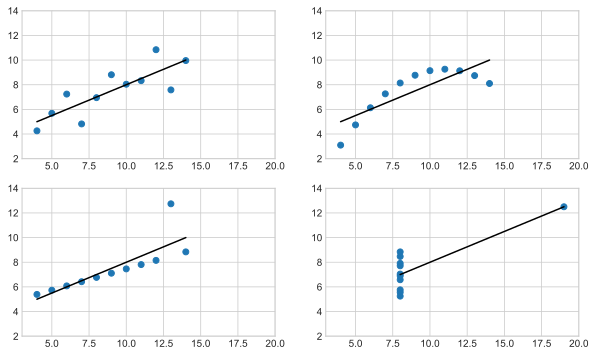

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()

for i, ax in enumerate(axes.flatten()):
    x_key = f'x{i + 1}'
    y_key = f'y{i + 1}'
    
    ax.scatter(AD[x_key], AD[y_key])
    ax.plot(AD[x_key], B[i][0] + B[i][1]*AD[x_key], color='black')
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)